Lab 5 - Using link functions to create generalized linear models

In [1]:
import cmdstanpy
cmdstanpy.install_cmdstan()

from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

Installing CmdStan version: 2.32.0
Install directory: /root/.cmdstan
CmdStan version 2.32.0 already installed


In [2]:
data_set = pd.read_csv('Airline_data.csv')
data_set

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


In [3]:
data_set['Miles flown [100 mln miles]'] = data_set['Miles flown [100 mln miles]'].apply(lambda col: col/1000)
data_set

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3.863
1,1977,25,516,4.300
2,1978,31,754,5.027
3,1979,31,877,5.481
4,1980,22,814,5.814
5,1981,21,362,6.033
6,1982,26,764,5.877
7,1983,20,809,6.223
8,1984,16,223,7.433
9,1985,22,1066,7.107


In [4]:
model_ppc=CmdStanModel(stan_file='stan_5_1.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:cmd: /content/stan_5_1 info
cwd: None
20:04:34 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/stan_5_1', 'id=1', 'random', 'seed=29042020', 'output', 'file=/tmp/tmpgoycyprw/stan_5_1jmca2lr3/stan_5_1-20230424200434.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


20:04:34 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/stan_5_1', 'id=1', 'random', 'seed=29042020', 'output', 'file=/tmp/tmpgoycyprw/stan_5_1jmca2lr3/stan_5_1-20230424200434.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpgoycyprw/stan_5_1jmca2lr3/stan_5_1-20230424200434.csv
 console_msgs (if any):
	/tmp/tmpgoycyprw/stan_5_1jmca2lr3/stan_5_1-20230424200434_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)


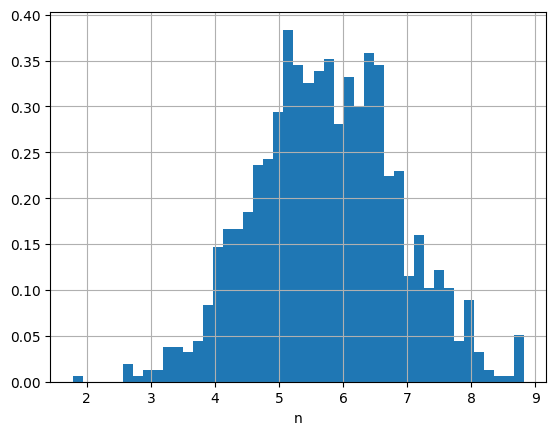

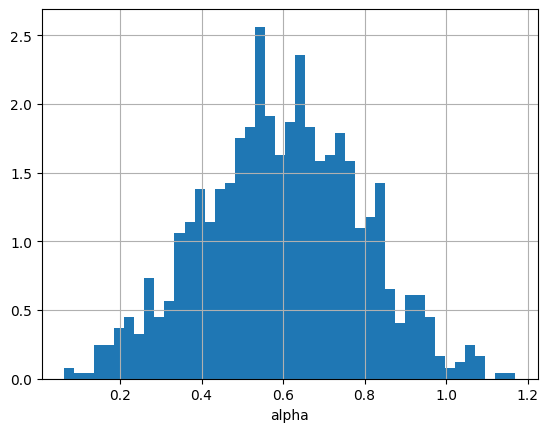

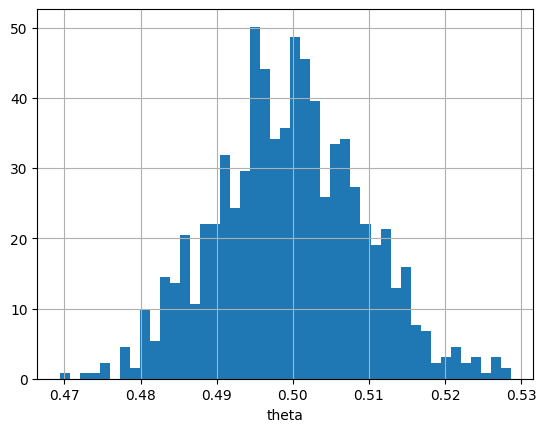

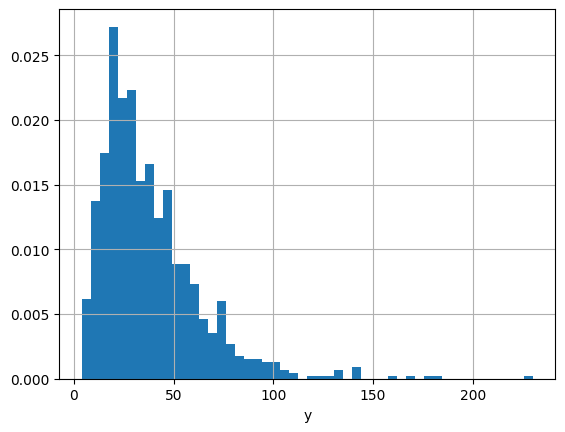

In [5]:
data1 = sim.draws_pd()

plt.figure()
plt.hist(data1['n'], bins=45, density=True)
plt.xlabel(f'n')
plt.grid()
plt.show()

plt.figure()
plt.hist(data1['alpha'], bins=45, density=True)
plt.xlabel(f'alpha')
plt.grid()
plt.show()

plt.figure()
plt.hist(data1['theta'], bins=45, density=True)
plt.xlabel(f'theta')
plt.grid()
plt.show()

plt.figure()
plt.hist(data1['y'], bins=50, density=True)
plt.xlabel(f'y')
plt.grid()
plt.show()

In [6]:
model_1_fit=CmdStanModel(stan_file='stan_5_2.stan')

DEBUG:cmdstanpy:found newer exe file, not recompiling


In [7]:
fit = model_1_fit.sample(data={"n": data_set.shape[0], "log_miles": data_set["Miles flown [100 mln miles]"].values, "y": data_set["Fatal accidents"].values})

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgoycyprw/fwphchu5.json
DEBUG:cmdstanpy:cmd: /content/stan_5_2 info
cwd: None
20:04:37 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/stan_5_2', 'id=2', 'random', 'seed=32666', 'data', 'file=/tmp/tmpgoycyprw/fwphchu5.json', 'output', 'file=/tmp/tmpgoycyprw/stan_5_2dglqsa8l/stan_5_2-20230424200438_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/stan_5_2', 'id=1', 'random', 'seed=32666', 'data', 'file=/tmp/tmpgoycyprw/fwphchu5.json', 'output', 'file=/tmp/tmpgoycyprw/stan_5_2dglqsa8l/stan_5_2-20230424200438_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/stan_5_2', 'id=3', 'random', 'seed=32666', 'data', 'file=/tmp/tmpgoycyprw/fwphchu5.json', 'output', 'file=/tmp/tmpgoycyprw/stan_5_2dglqsa8l/stan_5_2-20230424200438_3.csv', 'method=sample', 'algorithm=hmc', 'adap

20:04:39 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/stan_5_2', 'id=1', 'random', 'seed=32666', 'data', 'file=/tmp/tmpgoycyprw/fwphchu5.json', 'output', 'file=/tmp/tmpgoycyprw/stan_5_2dglqsa8l/stan_5_2-20230424200438_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpgoycyprw/stan_5_2dglqsa8l/stan_5_2-20230424200438_1.csv
 console_msgs (if any):
	/tmp/tmpgoycyprw/stan_5_2dglqsa8l/stan_5_2-20230424200438_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa 

In [8]:
def show_plot(df):
  years_list = data_set['Year'].values

  for i in range(0, data_set.shape[0]):
      y_sample = df[f'y_sample[{f"{str(i+1)}"}]']
      plt.figure(i)
      plt.axvline(y_sample.mean(), color = 'k', label=f'Mean value - {y_sample.mean()}')
      plt.hist(y_sample, bins=45, label = f'Samples')
      plt.axvline(data_set["Fatal accidents"][i], color = 'g', label=f'Observed value - {data_set["Fatal accidents"][i]}')
      plt.title(f'Year: {years_list[i]}')
      plt.legend()
      plt.grid()
      plt.show()
  return

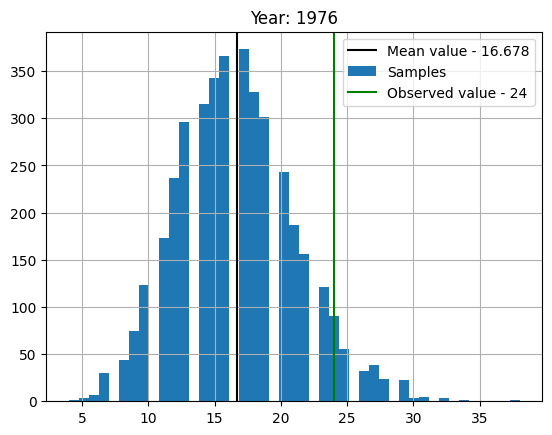

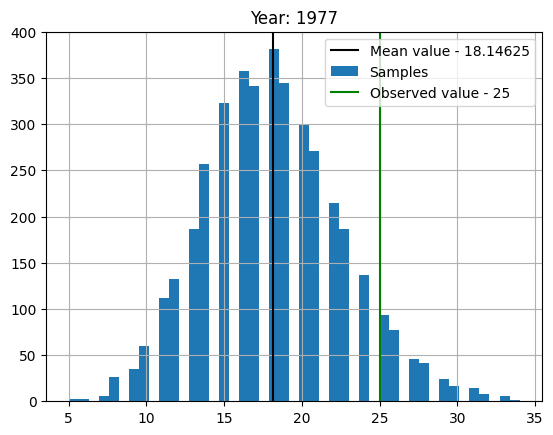

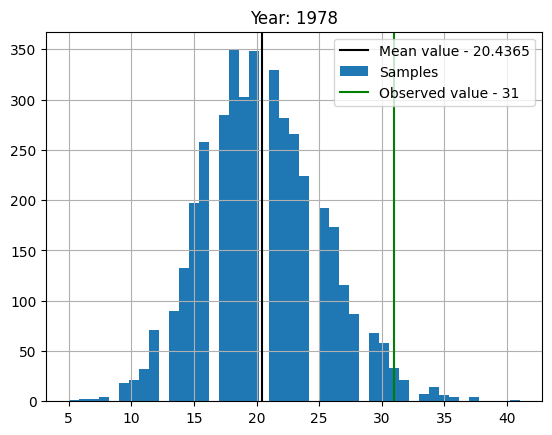

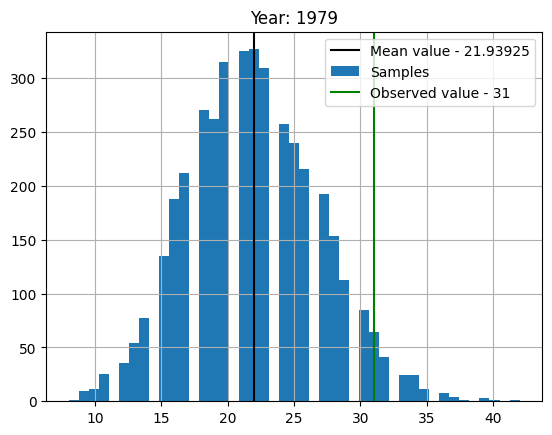

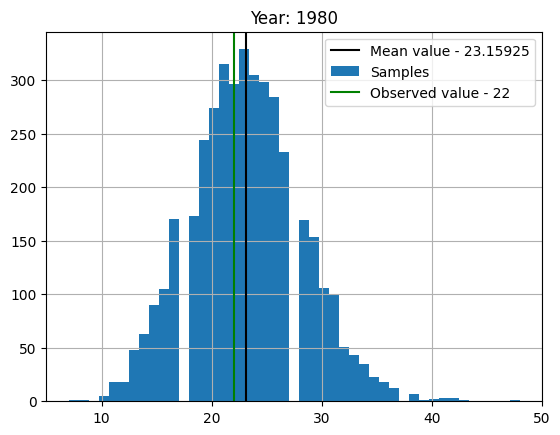

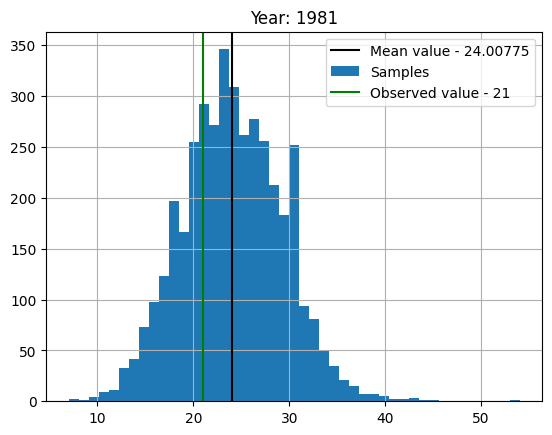

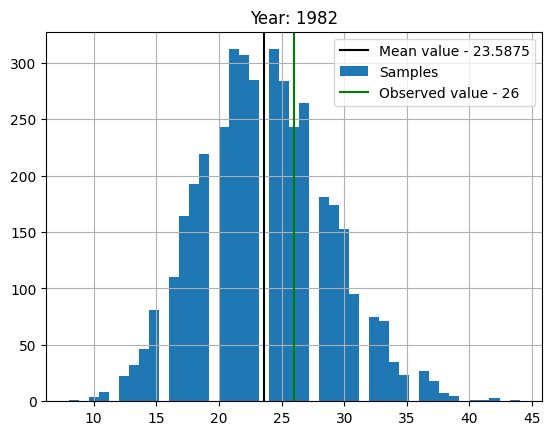

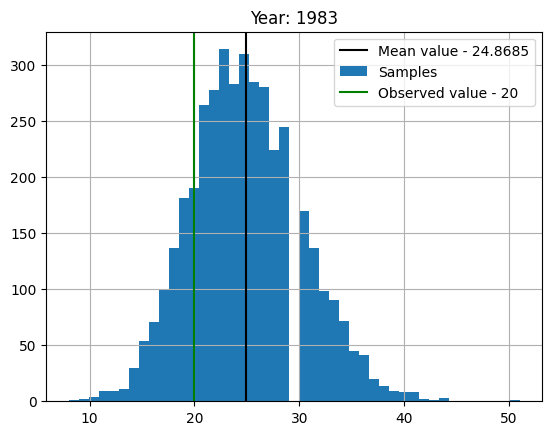

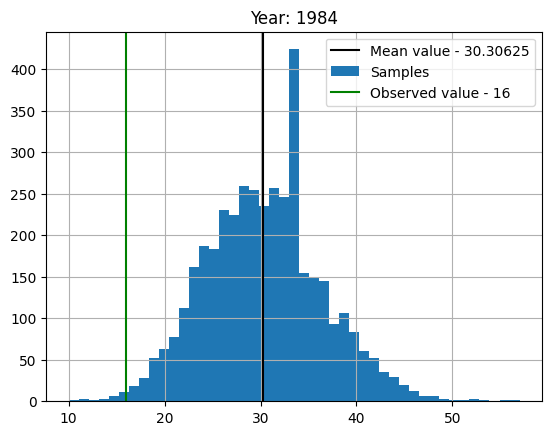

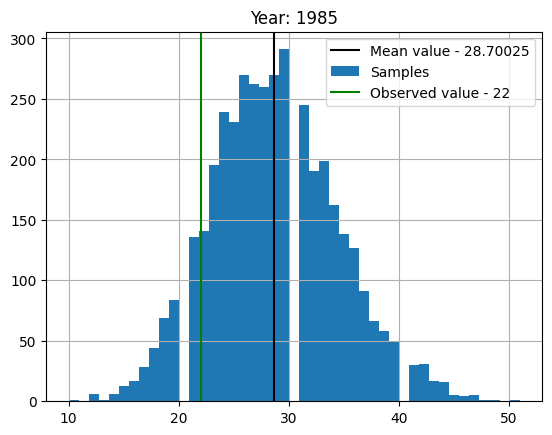

In [9]:
data2 = fit.draws_pd()
show_plot(data2)

In [10]:
model_1_fit_1=CmdStanModel(stan_file='stan_5_3.stan')

DEBUG:cmdstanpy:found newer exe file, not recompiling


In [11]:
fit = model_1_fit_1.sample(data={"n": data_set.shape[0], "log_miles": data_set["Miles flown [100 mln miles]"].values, "y": data_set["Fatal accidents"].values})

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgoycyprw/4dfmx4wc.json
DEBUG:cmdstanpy:cmd: /content/stan_5_3 info
cwd: None
20:04:50 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/stan_5_3', 'id=1', 'random', 'seed=55602', 'data', 'file=/tmp/tmpgoycyprw/4dfmx4wc.json', 'output', 'file=/tmp/tmpgoycyprw/stan_5_3x2hfo4fh/stan_5_3-20230424200450_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/stan_5_3', 'id=2', 'random', 'seed=55602', 'data', 'file=/tmp/tmpgoycyprw/4dfmx4wc.json', 'output', 'file=/tmp/tmpgoycyprw/stan_5_3x2hfo4fh/stan_5_3-20230424200450_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/stan_5_3', 'id=3', 'random', 'seed=55602', 'data', 'file=/tmp/tmpgoycyprw/4dfmx4wc.json', 'output', 'file=/tmp/tmpgoycyprw/stan_5_3x2hfo4fh/stan_5_3-20230424200450_3.csv', 'method=sample', 'algorithm=hmc', 'adap

20:04:52 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/stan_5_3', 'id=1', 'random', 'seed=55602', 'data', 'file=/tmp/tmpgoycyprw/4dfmx4wc.json', 'output', 'file=/tmp/tmpgoycyprw/stan_5_3x2hfo4fh/stan_5_3-20230424200450_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpgoycyprw/stan_5_3x2hfo4fh/stan_5_3-20230424200450_1.csv
 console_msgs (if any):
	/tmp/tmpgoycyprw/stan_5_3x2hfo4fh/stan_5_3-20230424200450_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa 

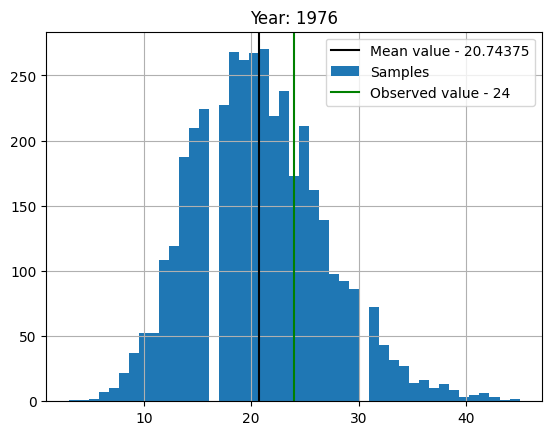

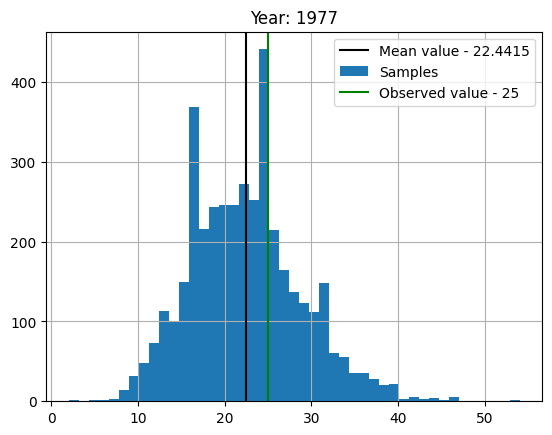

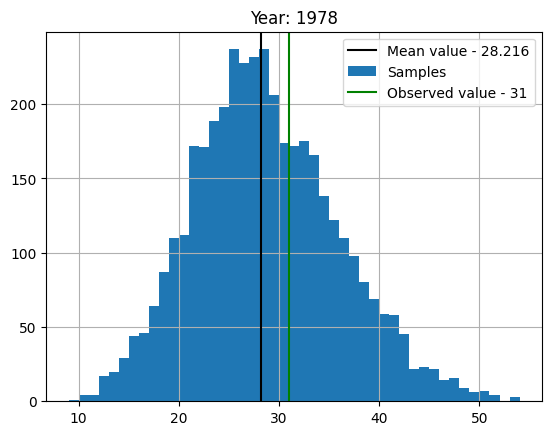

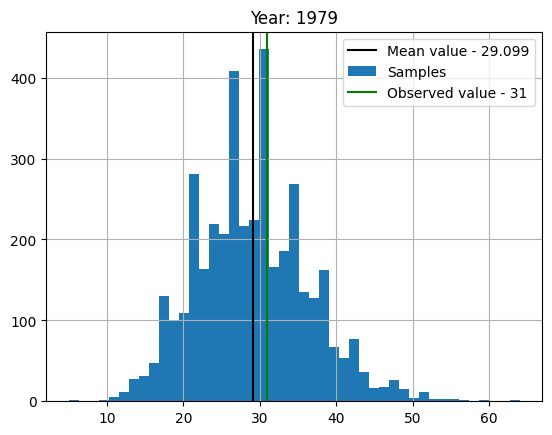

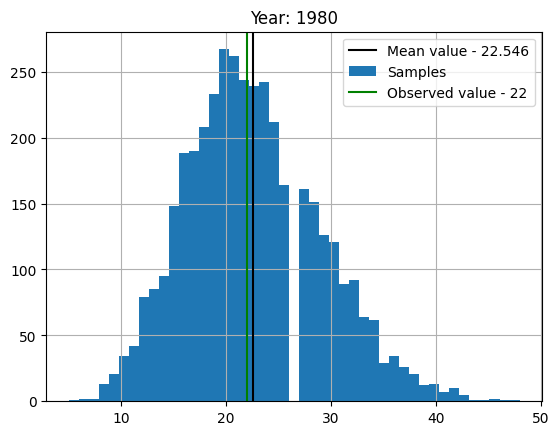

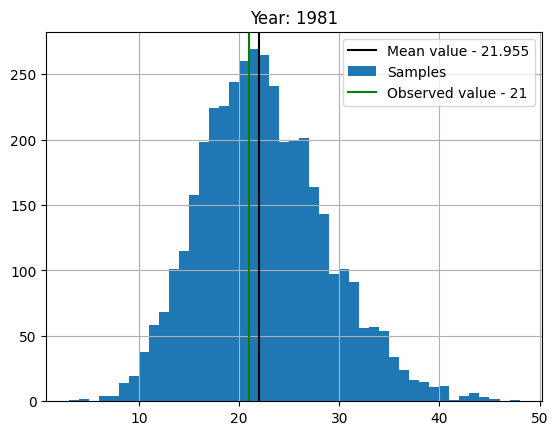

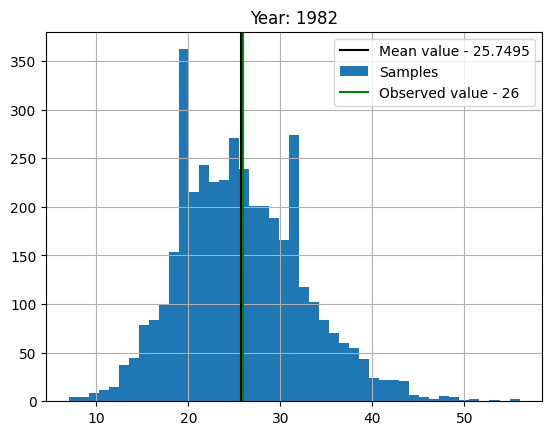

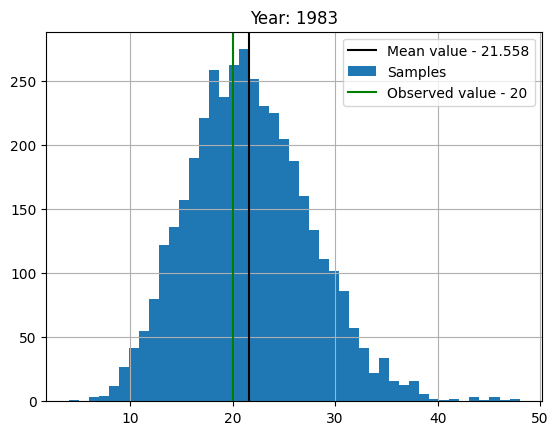

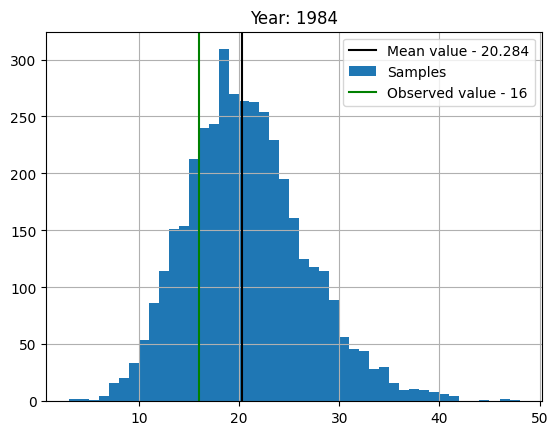

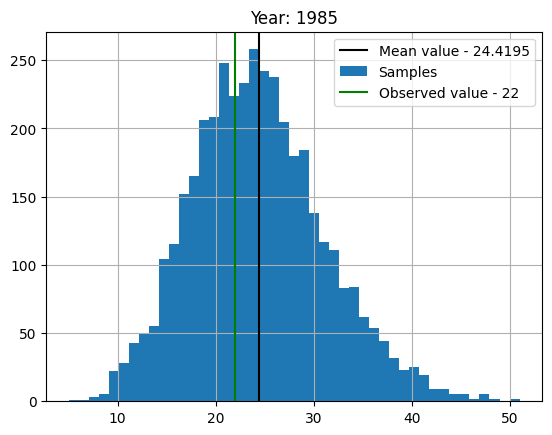

In [12]:
data3 = fit.draws_pd()

show_plot(data3)